#HR Analytics: Job Change of Data Scientists


Predict: who will move to a new job?

Context and Content:


A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Features:

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

#load the datasets from kaggle

In [ ]:
mkdir ~/.kaggle/

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists

  0% 0.00/295k [00:00<?, ?B/s]
100% 295k/295k [00:00<00:00, 40.2MB/s]


In [ ]:
!unzip hr-analytics-job-change-of-data-scientists.zip

Archive:  hr-analytics-job-change-of-data-scientists.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


#prepare the datasets

In [ ]:
#importing libraries to manipulate,analysis and visualizate the datasets. 
#Also using them for the models: entering an algorithms into the datasets to train and test the models 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics,model_selection,linear_model,neighbors,svm,tree
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import xgboost as xgb

In [ ]:
#read the path of what I need "training.csv"

df=pd.read_csv('/content/aug_train.csv') 
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
#remove NAN from rows of columns 

df['last_new_job'].replace(np.nan,inplace=True)
df['company_size'].fillna(method='ffill')
df['experience'].replace(np.nan,inplace=True)

In [ ]:
#Convert all non numeric thing to numerical by create function building from scratch

def Convert_text_to_num(x):
    set_x=set(x)
    index_W={}
    W_index={}
    for i,W in enumerate(set_x):
      index_W[i]=W
      W_index[W]=i
    x=x.replace(W_index)
    return x

In [ ]:
df.experience=Convert_text_to_num(df.experience)
df.company_size=Convert_text_to_num(df.company_size)
df.last_new_job=Convert_text_to_num(df.last_new_job)
df.city=Convert_text_to_num(df.city)

df.isnull()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,True,False,False,False
3,False,False,False,True,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,False,False,False,False,False,False,False,False,False,False,True,False,False,False
19154,False,False,False,False,False,False,False,False,False,False,True,False,False,False
19155,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19156,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  int64  
 10  company_type            13018 non-null  object 
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(6), object(6)
mem

In [ ]:
df['gender'].value_counts() #To see the contents of each column

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [ ]:
#Convert all non numeric thing to numerical by create labels value 

female_label,male_label,other_label = (0,1,2)
Has_relevent_experience_label,No_relevent_experience_label = (0,1)
no_enrollment_label,Full_time_course_label,Part_time_course_label = (0,1,2)
Graduate_label,Masters_label,High_School_label,Phd_label,Primary_School_label = (0,1,2,3,4)
STEM_label,Humanities_label,Other_label,Business_Degree_label,Arts_label,No_Major_label = (0,1,2,3,4,5)
Pvt_Ltd_label,Funded_Startup_label,Public_Sector_label,Early_Stage_Startup_label,NGO_label,Other_c_label = (0,1,2,3,4,5)

df['gender']=df['gender'].map({
    'Male': male_label,
    'Female': female_label,
    'Other': other_label
})
df['relevent_experience']=df['relevent_experience'].map({
    'No relevent experience': No_relevent_experience_label,
    'Has relevent experience': Has_relevent_experience_label
})
df['enrolled_university']=df['enrolled_university'].map({
    'no_enrollment' : no_enrollment_label,
    'Full time course' : Full_time_course_label,
    'Part time course' : Part_time_course_label
})
df['education_level']=df['education_level'].map({
    'Graduate' : Graduate_label,
    'Masters' : Masters_label,
    'High School' : High_School_label,
    'Phd' : Phd_label,
    'Primary School' : Primary_School_label       
})
df['major_discipline']=df['major_discipline'].map({
    'STEM' : STEM_label,
    'Humanities' : Humanities_label,
    'Other' : Other_label,
    'Business Degree' : Business_Degree_label,
    'Arts' : Arts_label,
    'No Major' : No_Major_label
})
df['company_type']=df['company_type'].map({
    'Pvt Ltd' : Pvt_Ltd_label,
    'Funded Startup' : Funded_Startup_label,
    'Public Sector' : Public_Sector_label,
    'Early Stage Startup' : Early_Stage_Startup_label,
    'NGO' : NGO_label,
    'Other' : Other_c_label
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  float64
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  int64  
 10  company_type            13018 non-null  float64
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 

In [ ]:
#remove NAN from rows of columns 

df['gender'].fillna(method='ffill',inplace=True)
df['major_discipline'].fillna(method='ffill',inplace=True)
df['enrolled_university'].fillna(method='ffill',inplace=True)
df['company_type'].fillna(df.groupby('company_size')['company_type'].transform("median"),inplace=True)
df['education_level'].fillna(df.groupby('relevent_experience')['education_level'].transform("median"),inplace=True)

In [ ]:
df.isnull()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19154,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19155,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19156,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     19158 non-null  float64
 6   education_level         19158 non-null  float64
 7   major_discipline        19158 non-null  float64
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  int64  
 10  company_type            19158 non-null  float64
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 

#Gender Bias

Text(0, 0.5, 'Count of People')

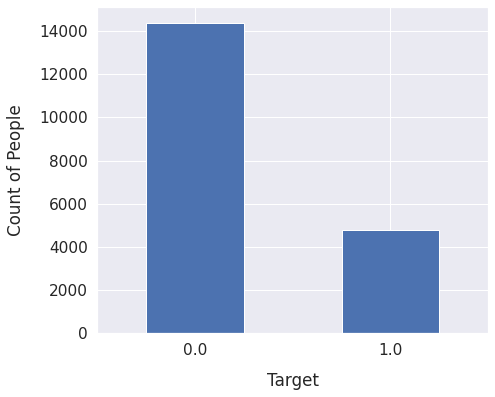

In [ ]:
sns.set(font_scale=1.4)
df['target'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Target", labelpad=14)
plt.ylabel("Count of People", labelpad=14)

Text(0, 0.5, 'Count of People')

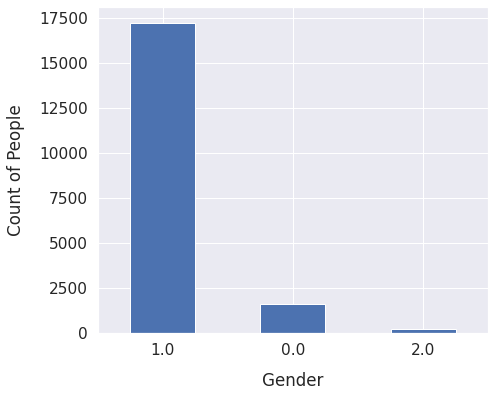

In [ ]:
#show details of gender column

sns.set(font_scale=1.4)
df['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)

We have a gender bias here in the dataset, so I will make TWO models for male and female or (0,1).

others don’t have a number that can be useful for models, so I will ignore them.

In [ ]:
new_df=df.query('gender in [0,1]',inplace=False)

In [ ]:
new_df['gender'].value_counts()

1.0    17260
0.0     1647
Name: gender, dtype: int64

In [ ]:
data_male=new_df.copy()
data_male.query('gender in [1]',inplace=True) #this for male dataset or 1

In [ ]:
data_male['gender'].value_counts()

1.0    17260
Name: gender, dtype: int64

In [ ]:
data_female=new_df.copy()

In [ ]:
data_female.query('gender in [0]',inplace=True) #and this for female dataset or 0

In [ ]:
data_female['gender'].value_counts()

0.0    1647
Name: gender, dtype: int64

#Male models

##preporessing 

In [ ]:
x_male=data_male[['enrollee_id','city_development_index','relevent_experience',
       'enrolled_university','education_level','major_discipline','experience',
       'company_size','company_type','last_new_job','training_hours','city','gender']]

y_male=data_male['target'].values

In [ ]:
y1=y_male
y1

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
x_male

,enrollee_id,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,city,gender
0,8949,0.920,0,0.0,0.0,0.0,3,0,0.0,0,36,9,1.0
1,29725,0.776,1,0.0,0.0,0.0,11,8,0.0,2,47,69,1.0
2,11561,0.624,1,1.0,0.0,0.0,8,0,0.0,3,83,11,1.0
3,33241,0.789,1,1.0,0.0,3.0,12,0,0.0,3,52,38,1.0
4,666,0.767,0,0.0,1.0,0.0,3,8,1.0,4,8,72,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,1,0.0,0.0,1.0,14,0,0.0,0,42,17,1.0
19154,31398,0.920,0,0.0,0.0,0.0,14,0,0.0,4,52,9,1.0
19155,24576,0.920,0,0.0,0.0,0.0,3,8,0.0,4,44,9,1.0
19156,5756,0.802,0,0.0,2.0,0.0,12,4,0.0,1,97,54,1.0


In [ ]:
#y don’t need normalizer because its 0 or 1

x_male_normalizer=preprocessing.StandardScaler()
new_x_male=x_male_normalizer.fit_transform(x_male)
new_x_male

array([[-0.81880778,  0.74456443, -0.61565805, ..., -0.48699241,
        -0.81615469,  0.        ],
       [ 1.33524331, -0.42005234,  1.62427828, ..., -0.30370911,
         0.83024672,  0.        ],
       [-0.54799619, -1.64937004,  1.62427828, ...,  0.29612717,
        -0.76127465,  0.        ],
       ...,
       [ 0.80139613,  0.74456443, -0.61565805, ..., -0.35369546,
        -0.81615469,  0.        ],
       [-1.14985731, -0.20977431, -0.61565805, ...,  0.52939683,
         0.41864637,  0.        ],
       [ 0.72446574,  0.21886936,  1.62427828, ...,  1.02926038,
        -0.34967429,  0.        ]])

In [ ]:
x1=new_x_male
x1

array([[-0.81880778,  0.74456443, -0.61565805, ..., -0.48699241,
        -0.81615469,  0.        ],
       [ 1.33524331, -0.42005234,  1.62427828, ..., -0.30370911,
         0.83024672,  0.        ],
       [-0.54799619, -1.64937004,  1.62427828, ...,  0.29612717,
        -0.76127465,  0.        ],
       ...,
       [ 0.80139613,  0.74456443, -0.61565805, ..., -0.35369546,
        -0.81615469,  0.        ],
       [-1.14985731, -0.20977431, -0.61565805, ...,  0.52939683,
         0.41864637,  0.        ],
       [ 0.72446574,  0.21886936,  1.62427828, ...,  1.02926038,
        -0.34967429,  0.        ]])

##Testing & training 

In [ ]:
#30% for testing

x1_train,x1_test,y1_train,y1_test=model_selection.train_test_split(x1,y1,test_size=0.3,random_state=42,stratify=y1)

In [ ]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((12082, 13), (5178, 13), (12082,), (5178,))

##Linear model

In [ ]:
clf_male=linear_model.LogisticRegressionCV() #Classification
clf_male.fit(x1_train,y1_train) #fit the model for training dataset

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
pred_male=clf_male.predict(x1_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y1_test,pred_male)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y1_test,pred_male)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y1_test,pred_male)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y1_test,pred_male)}') #accuracy=TP+TF/Total Samples

precision score is: 0.5818181818181818
recall score is: 0.27651217596229377
f1 score is: 0.3748668796592119
accuracy score is: 0.7732715334105832


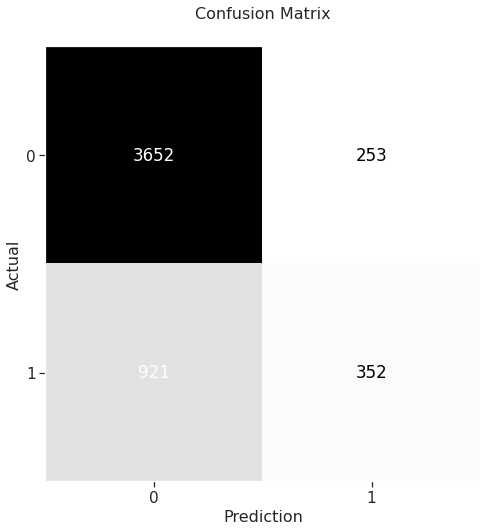

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y1_test,pred_male)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greys,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##KNN model

In [ ]:
KNN_model_male=neighbors.KNeighborsClassifier(n_neighbors=3) #Classification
KNN_model_male.fit(x1_train,y1_train) #fit the model for training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_pred_male=KNN_model_male.predict(x1_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y1_test,knn_pred_male)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y1_test,knn_pred_male)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y1_test,knn_pred_male)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y1_test,knn_pred_male)}') #accuracy=TP+TF/Total Samples

precision score is: 0.47960199004975124
recall score is: 0.3786331500392773
f1 score is: 0.42317822651448644
accuracy score is: 0.746234067207416


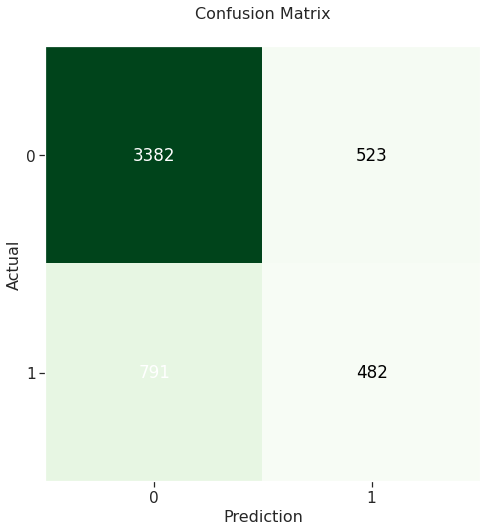

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y1_test,knn_pred_male)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greens,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##Decision Tree model

In [ ]:
tree_model_male=tree.DecisionTreeClassifier() #Classification
tree_model_male.fit(x1_train,y1_train) #fit the model for training dataset

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred_male=tree_model_male.predict(x1_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y1_test,tree_pred_male)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y1_test,tree_pred_male)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y1_test,tree_pred_male)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y1_test,tree_pred_male)}') #accuracy=TP+TF/Total Samples

precision score is: 0.422140221402214
recall score is: 0.4493322859387274
f1 score is: 0.4353120243531202
accuracy score is: 0.7134028582464272


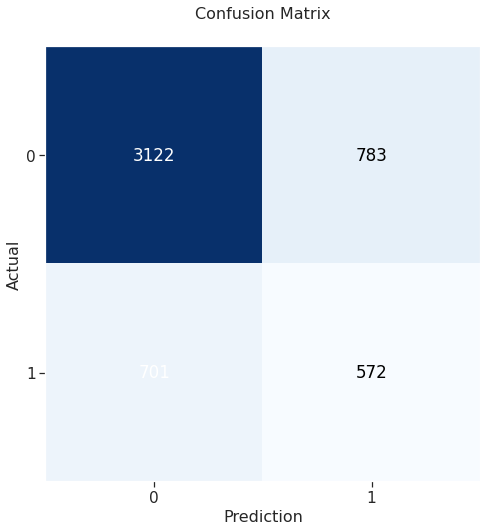

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y1_test,tree_pred_male)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

In [ ]:
text_representation = tree.export_text(tree_model_male)
print(text_representation)

|--- feature_1 <= -1.65
|   |--- feature_10 <= 0.37
|   |   |--- feature_4 <= 1.05
|   |   |   |--- feature_0 <= -1.18
|   |   |   |   |--- feature_0 <= -1.21
|   |   |   |   |   |--- feature_7 <= -0.92
|   |   |   |   |   |   |--- feature_0 <= -1.24
|   |   |   |   |   |   |   |--- feature_9 <= 1.37
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.43
|   |   |   |   |   |   |   |   |   |--- feature_4 <= -0.08
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  -0.08
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_0 >  -1.43
|   |   |   |   |   |   |   |   |   |--- feature_0 <= -1.37
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |  

##SVM model

In [ ]:
svm_model_male=svm.SVC() #Classification
svm_model_male.fit(x1_train,y1_train) #fit the model for training dataset

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_pred_male=svm_model_male.predict(x1_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y1_test,svm_pred_male)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y1_test,svm_pred_male)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y1_test,svm_pred_male)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y1_test,svm_pred_male)}') #accuracy=TP+TF/Total Samples

precision score is: 0.5863746958637469
recall score is: 0.3786331500392773
f1 score is: 0.46014319809069204
accuracy score is: 0.7815758980301275


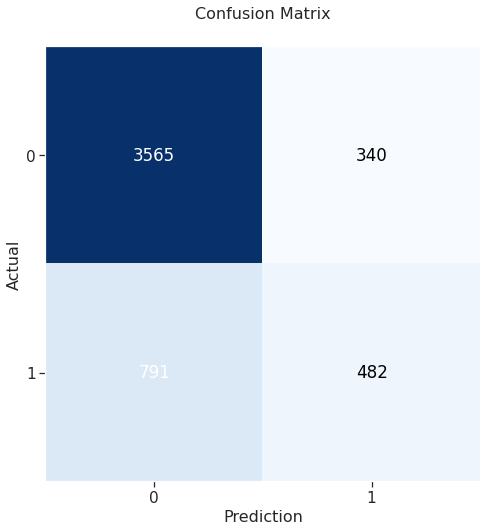

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y1_test,svm_pred_male)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##DNN Model 

In [ ]:
#Using a 10% of training for validation x_train,y_train

x1_train_val=x1_train[:1208]
y1_train_val=y1_train[:1208]
x1_test_val=x1_test
y1_test_val=y1_test

In [ ]:
x1_train_val.shape,y1_train_val.shape

((1208, 13), (1208,))

In [ ]:
#Now I will create the model by layers for input which are relu activation functions 
#and one layer for output which is sigmoid activation function 

model_male=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(13)),
                                  tf.keras.layers.Dense(units=16,activation=tf.nn.relu,kernel_initializer=tf.initializers.he_normal,name='layer_1'),
                                  tf.keras.layers.Dense(units=32,activation=tf.nn.relu,kernel_initializer=tf.initializers.he_normal,name='layer_2'),
                                  tf.keras.layers.Dense(units=64,activation=tf.nn.relu,kernel_initializer=tf.initializers.he_normal,name='layer_3'),
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.relu,kernel_initializer=tf.initializers.he_normal,name='layer_4'),



                                  tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid,name='output')
                                  

])

In [ ]:
model_male.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.BinaryCrossentropy(),metrics=['acc'])

In [ ]:
#fit the model for training dataset

model_male.fit(x=x1_train,y=y1_train,batch_size=20,epochs=12,validation_data=(x1_train_val,y1_train_val))

Epoch 1/12
605/605 [==============================] - 2s 2ms/step - loss: 0.5174 - acc: 0.7578 - val_loss: 0.4655 - val_acc: 0.7690
Epoch 2/12
605/605 [==============================] - 1s 2ms/step - loss: 0.4797 - acc: 0.7740 - val_loss: 0.4496 - val_acc: 0.7914
Epoch 3/12
605/605 [==============================] - 1s 2ms/step - loss: 0.4690 - acc: 0.7791 - val_loss: 0.4487 - val_acc: 0.7773
Epoch 4/12
605/605 [==============================] - 1s 2ms/step - loss: 0.4645 - acc: 0.7821 - val_loss: 0.4330 - val_acc: 0.7922
Epoch 5/12
605/605 [==============================] - 1s 2ms/step - loss: 0.4621 - acc: 0.7815 - val_loss: 0.4378 - val_acc: 0.7707
Epoch 6/12
605/605 [==============================] - 1s 2ms/step - loss: 0.4568 - acc: 0.7866 - val_loss: 0.4266 - val_acc: 0.8005
Epoch 7/12
605/605 [==============================] - 1s 2ms/step - loss: 0.4554 - acc: 0.7854 - val_loss: 0.4242 - val_acc: 0.7955
Epoch 8/12
605/605 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
_data_male=pd.DataFrame(model_male.history.history)
_data_male

,loss,acc,val_loss,val_acc
0,0.517371,0.757822,0.465513,0.769040
1,0.479677,0.773961,0.449554,0.791391
2,0.469003,0.779093,0.448748,0.777318
3,0.464482,0.782072,0.433015,0.792219
4,0.462117,0.781493,0.437770,0.770695
5,0.456793,0.786625,0.426572,0.800497
6,0.455450,0.785383,0.424196,0.795530
7,0.450666,0.789522,0.433014,0.807119
8,0.448756,0.791011,0.413066,0.802152
9,0.445786,0.789439,0.428956,0.809603


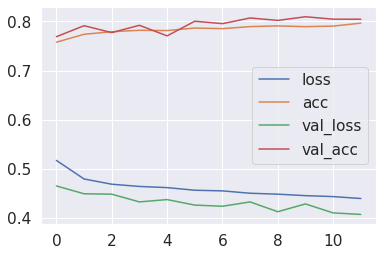

In [ ]:
_data_male[['loss', 'acc','val_loss','val_acc']].plot.line()

In [ ]:
dnn_pred_male=model_male.predict(x1_test_val)

In [ ]:
print(tf.reduce_mean(tf.keras.metrics.binary_accuracy(y1_test_val,dnn_pred_male)))

tf.Tensor(0.6764035, shape=(), dtype=float32)


DNN not good for this classification model 

##Random Forest model

In [ ]:
forest_model_male=RandomForestClassifier() #Classification
forest_model_male.fit(x1_train,y1_train) #fit the model for training dataset

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
forest_pred_male=forest_model_male.predict(x1_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y1_test,forest_pred_male)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y1_test,forest_pred_male)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y1_test,forest_pred_male)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y1_test,forest_pred_male)}') #accuracy=TP+TF/Total Samples

precision score is: 0.567032967032967
recall score is: 0.4053417124901807
f1 score is: 0.472743930371049
accuracy score is: 0.7777134028582464


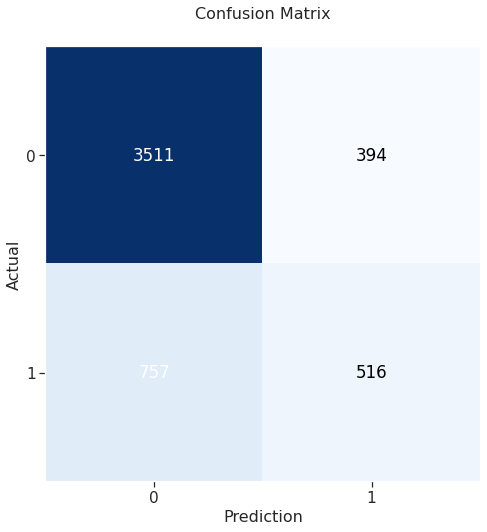

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y1_test,forest_pred_male)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##XGBoost Model

In [ ]:
xgb_model_male=xgb.XGBClassifier(max_depth=4,
                            n_estimators=120,
                            scale_pos_weight=1.3,
                            base_score=0.1,
                            random_state=42)

xgb_model_male.fit(x1_train,y1_train)

XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.3, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#predict the train and test model

xgb_train_pred1=xgb_model_male.predict(x1_train)
xgb_test_pred1=xgb_model_male.predict(x1_test)

In [ ]:
#accuracy score for the train and test model


print(f'accuracy train score is: {metrics.accuracy_score(y1_train,xgb_train_pred1)}') #accuracy=TP+TF/Total Samples
print(f'accuracy test score is: {metrics.accuracy_score(y1_test,xgb_test_pred1)}') #accuracy=TP+TF/Total Samples

accuracy train score is: 0.8174143353749379
accuracy test score is: 0.8014677481653147


In [ ]:
#precision score,recall score and f1 score for test the model 

print(f'precision score is: {metrics.precision_score(y1_test,xgb_test_pred1)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y1_test,xgb_test_pred1)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y1_test,xgb_test_pred1)}') #f1=2*precision*recall/precision+recall

precision score is: 0.5924528301886792
recall score is: 0.6166535742340927
f1 score is: 0.6043110084680523


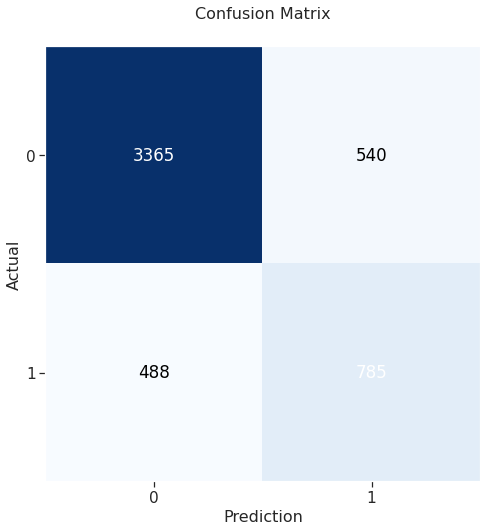

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y1_test,xgb_test_pred1)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

XGBoost is the best classification model of the Male.

#Female Models

##preporessing 

In [ ]:
x_female=data_female[['enrollee_id','city_development_index','relevent_experience',
       'enrolled_university','education_level','major_discipline','experience',
       'company_size','company_type','last_new_job','training_hours','city','gender']]

y_female=data_female['target'].values

In [ ]:
x_female

,enrollee_id,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,city,gender
19,11399,0.827,0,0.0,0.0,4.0,18,0,0.0,0,132,77,0.0
32,4324,0.920,1,1.0,0.0,0.0,8,0,0.0,0,24,9,0.0
33,26966,0.920,0,0.0,0.0,0.0,3,1,0.0,2,82,36,0.0
40,2547,0.926,0,1.0,1.0,0.0,17,5,2.0,1,14,64,0.0
45,22452,0.624,1,1.0,1.0,0.0,8,0,0.0,3,26,11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19056,26961,0.920,0,0.0,0.0,0.0,21,1,0.0,0,44,9,0.0
19070,26153,0.920,1,0.0,0.0,4.0,13,5,0.0,0,8,9,0.0
19110,1281,0.920,0,0.0,1.0,0.0,21,6,3.0,0,18,9,0.0
19150,32313,0.920,0,0.0,0.0,0.0,5,1,2.0,5,23,36,0.0


In [ ]:
y2=y_female
y2.shape

(1647,)

In [ ]:
#y don’t need normalizer because its 0 or 1

x_female_normalizer=preprocessing.StandardScaler()
new_x_female=x_female_normalizer.fit_transform(x_female)
new_x_female

array([[-0.61983742, -0.06419789, -0.67068916, ...,  1.09556133,
         1.2640276 ,  0.        ],
       [-1.39057761,  0.69795173,  1.49100368, ..., -0.70857761,
        -0.70342431,  0.        ],
       [ 1.07600887,  0.69795173, -0.67068916, ...,  0.26031182,
         0.07776983,  0.        ],
       ...,
       [-1.72207759,  0.69795173, -0.67068916, ..., -0.80880755,
        -0.70342431,  0.        ],
       [ 1.65850325,  0.69795173, -0.67068916, ..., -0.7252826 ,
         0.07776983,  0.        ],
       [ 1.37972952,  0.69795173, -0.67068916, ..., -0.69187262,
        -0.70342431,  0.        ]])

In [ ]:
x2=new_x_female
x2.shape

(1647, 13)

##Testing & training 

In [ ]:
#30% for testing

x2_train,x2_test,y2_train,y2_test=model_selection.train_test_split(x2,y2,test_size=0.3,random_state=42,stratify=y2)

In [ ]:
x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

((1152, 13), (495, 13), (1152,), (495,))

##Linear model

In [ ]:
clf_f=linear_model.LogisticRegressionCV() #Classification
clf_f.fit(x2_train,y2_train) #fit the model for training dataset

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
pred_f=clf_f.predict(x2_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y2_test,pred_f)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y2_test,pred_f)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y2_test,pred_f)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y2_test,pred_f)}') #accuracy=TP+TF/Total Samples

precision score is: 0.6326530612244898
recall score is: 0.22302158273381295
f1 score is: 0.3297872340425532
accuracy score is: 0.7454545454545455


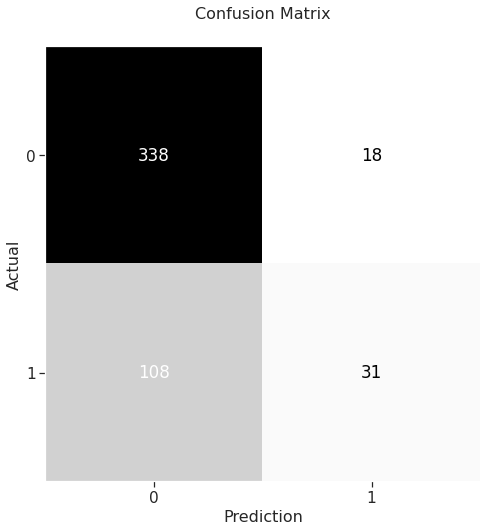

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y2_test,pred_f)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greys,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##KNN model

In [ ]:
KNN_model_f=neighbors.KNeighborsClassifier(n_neighbors=3) #Classification
KNN_model_f.fit(x2_train,y2_train) #fit the model for training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_pred_f=KNN_model_f.predict(x2_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y2_test,knn_pred_f)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y2_test,knn_pred_f)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y2_test,knn_pred_f)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y2_test,knn_pred_f)}') #accuracy=TP+TF/Total Samples

precision score is: 0.5384615384615384
recall score is: 0.4028776978417266
f1 score is: 0.46090534979423864
accuracy score is: 0.7353535353535353


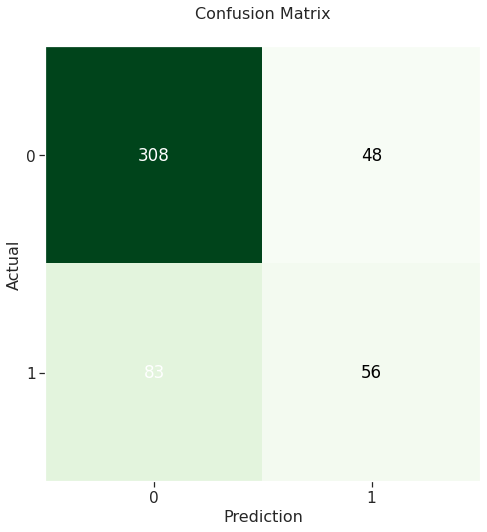

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y2_test,knn_pred_f)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Greens,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##Decision Tree model

In [ ]:
tree_model_f=tree.DecisionTreeClassifier() #Classification
tree_model_f.fit(x2_train,y2_train) #fit the model for training dataset

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred_f=tree_model_f.predict(x2_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y2_test,tree_pred_f)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y2_test,tree_pred_f)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y2_test,tree_pred_f)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y2_test,tree_pred_f)}') #accuracy=TP+TF/Total Samples

precision score is: 0.45112781954887216
recall score is: 0.4316546762589928
f1 score is: 0.4411764705882352
accuracy score is: 0.692929292929293


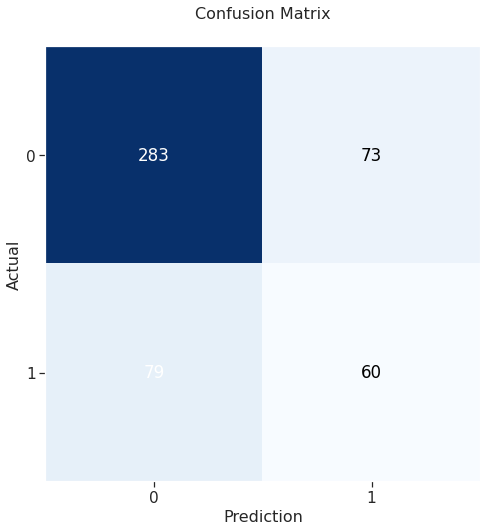

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y2_test,tree_pred_f)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##SVM model

In [ ]:
svm_model_f=svm.SVC() #Classification
svm_model_f.fit(x2_train,y2_train) #fit the model for training dataset

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_pred_f=svm_model_f.predict(x2_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y2_test,svm_pred_f)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y2_test,svm_pred_f)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y2_test,svm_pred_f)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y2_test,svm_pred_f)}') #accuracy=TP+TF/Total Samples

precision score is: 0.6470588235294118
recall score is: 0.39568345323741005
f1 score is: 0.4910714285714285
accuracy score is: 0.7696969696969697


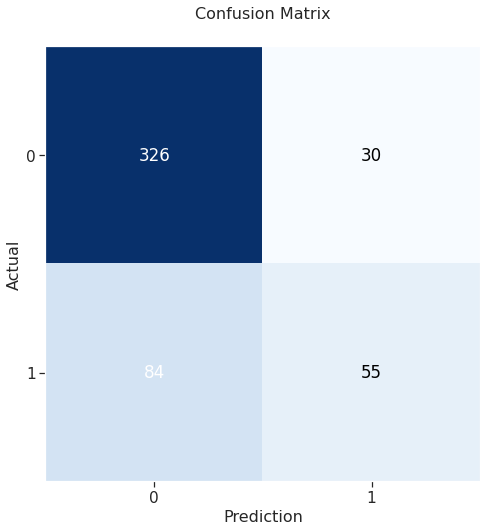

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y2_test,svm_pred_f)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##DNN Model 

In [ ]:
#Using a 10% of training for validation x_train,y_train

x2_train_val=x2_train[:115]
y2_train_val=y2_train[:115]
x2_test_val=x2_test
y2_test_val=y2_test

In [ ]:
x2_train_val.shape,y2_train_val.shape

((115, 13), (115,))

In [ ]:
#Now I will create the model by layers for input which are relu activation functions 
#and one layer for output which is sigmoid activation function 

model_female=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(13)),
                                  tf.keras.layers.Dense(units=8,activation=tf.nn.relu,kernel_initializer=tf.initializers.he_normal,name='layer_1'),
                                  tf.keras.layers.Dense(units=16,activation=tf.nn.relu,kernel_initializer=tf.initializers.he_normal,name='layer_2'),


                                  tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid,name='output')
                                  

])

In [ ]:
model_female.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.BinaryCrossentropy(),metrics=['acc'])

In [ ]:
#fit the model for training dataset

model_female.fit(x=x2_train,y=y2_train,batch_size=15,epochs=12,validation_data=(x2_train_val,y2_train_val))

Epoch 1/12
77/77 [==============================] - 0s 2ms/step - loss: 0.4461 - acc: 0.7951 - val_loss: 0.4943 - val_acc: 0.7217
Epoch 2/12
77/77 [==============================] - 0s 2ms/step - loss: 0.4462 - acc: 0.7995 - val_loss: 0.4934 - val_acc: 0.7217
Epoch 3/12
77/77 [==============================] - 0s 2ms/step - loss: 0.4453 - acc: 0.7934 - val_loss: 0.4936 - val_acc: 0.7217
Epoch 4/12
77/77 [==============================] - 0s 2ms/step - loss: 0.4441 - acc: 0.8021 - val_loss: 0.4930 - val_acc: 0.7130
Epoch 5/12
77/77 [==============================] - 0s 2ms/step - loss: 0.4433 - acc: 0.7969 - val_loss: 0.4920 - val_acc: 0.7130
Epoch 6/12
77/77 [==============================] - 0s 2ms/step - loss: 0.4427 - acc: 0.7995 - val_loss: 0.4908 - val_acc: 0.7304
Epoch 7/12
77/77 [==============================] - 0s 2ms/step - loss: 0.4423 - acc: 0.7995 - val_loss: 0.4910 - val_acc: 0.7304
Epoch 8/12
77/77 [==============================] - 0s 2ms/step - loss: 0.4417 - acc: 0.80

In [ ]:
_data_female=pd.DataFrame(model_female.history.history)
_data_female

,loss,acc,val_loss,val_acc
0,0.446129,0.795139,0.494264,0.721739
1,0.446196,0.799479,0.493445,0.721739
2,0.445283,0.793403,0.493650,0.721739
3,0.444100,0.802083,0.493031,0.713043
4,0.443284,0.796875,0.491998,0.713043
5,0.442657,0.799479,0.490783,0.730435
6,0.442282,0.799479,0.491017,0.730435
7,0.441689,0.803819,0.489355,0.747826
8,0.440309,0.798611,0.488380,0.747826
9,0.439992,0.796875,0.488909,0.747826


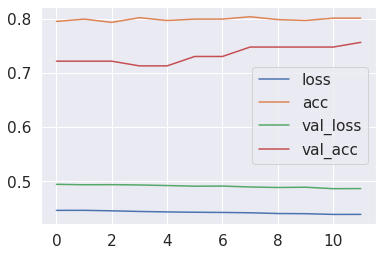

In [ ]:
_data_female[['loss', 'acc','val_loss','val_acc']].plot.line()

In [ ]:
dnn_pred_f=model_female.predict(x2_test_val)

print(tf.reduce_mean(tf.keras.metrics.binary_accuracy(y2_test_val,dnn_pred_f)))


tf.Tensor(0.63417196, shape=(), dtype=float32)


##Random Forest model

In [ ]:
forest_model_f=RandomForestClassifier() #Classification
forest_model_f.fit(x2_train,y2_train) #fit the model for training dataset

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
forest_pred_f=forest_model_f.predict(x2_test) #test the model

In [ ]:
print(f'precision score is: {metrics.precision_score(y2_test,forest_pred_f)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y2_test,forest_pred_f)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y2_test,forest_pred_f)}') #f1=2*precision*recall/precision+recall
print(f'accuracy score is: {metrics.accuracy_score(y2_test,forest_pred_f)}') #accuracy=TP+TF/Total Samples

precision score is: 0.5575221238938053
recall score is: 0.45323741007194246
f1 score is: 0.5
accuracy score is: 0.7454545454545455


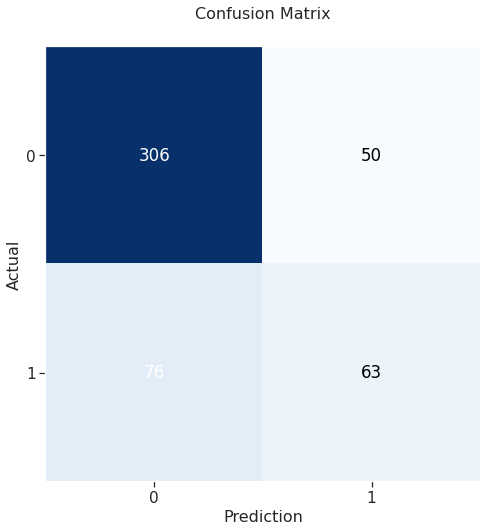

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y2_test,forest_pred_f)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

##XGBoost Model

In [ ]:
xgb_model_f=xgb.XGBClassifier(max_depth=2,learning_rate=0.1,n_estimators=100,random_state=42,verbosity=0,max_delta_step=2,scale_pos_weight=1.3,base_score=0.5)

xgb_model_f.fit(x2_train,y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=2, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.3, seed=None,
              silent=None, subsample=1, verbosity=0)

In [ ]:
#predict the train and test model

xgb_train_pred_f=xgb_model_f.predict(x2_train)
xgb_test_pred_f=xgb_model_f.predict(x2_test)

In [ ]:
#accuracy score for the train and test model


print(f'accuracy train score is: {metrics.accuracy_score(y2_train,xgb_train_pred_f)}') #accuracy=TP+TF/Total Samples
print(f'accuracy test score is: {metrics.accuracy_score(y2_test,xgb_test_pred_f)}') #accuracy=TP+TF/Total Samples

accuracy train score is: 0.8107638888888888
accuracy test score is: 0.7616161616161616


In [ ]:
#precision score,recall score and f1 score for test the model 

print(f'precision score is: {metrics.precision_score(y2_test,xgb_test_pred_f)}') #precision=TP/TP+FP
print(f'recall score is: {metrics.recall_score(y2_test,xgb_test_pred_f)}') #recall=TP/TP+FN
print(f'f1 score is: {metrics.f1_score(y2_test,xgb_test_pred_f)}') #f1=2*precision*recall/precision+recall

precision score is: 0.5652173913043478
recall score is: 0.6546762589928058
f1 score is: 0.6066666666666667


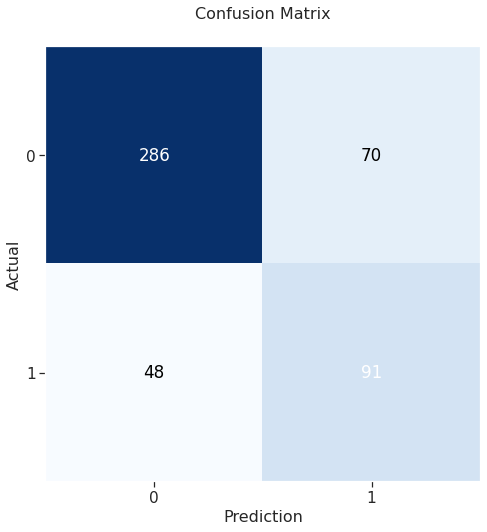

In [ ]:
#show the confusion matrix 

confusion_matrix=metrics.confusion_matrix(y2_test,xgb_test_pred_f)
fig= plot_confusion_matrix(conf_mat=confusion_matrix,cmap=plt.cm.Blues,figsize=(8,8))
plt.xlabel('Prediction',fontsize=16)
plt.ylabel('Actual',fontsize=16)
plt.title('Confusion Matrix',fontsize=16)
plt.show() #    TP  FP
           #    FN  TN

Also XGBoost is the best classification model of the Female 